<center><h1> Image Loading Color Manipulation </h1></center>

---



### **Loading Images and Accessing and Modifying Pixel Values**  
Almost all operations in this workshop are primarily related to Numpy rather than OpenCV. A solid understanding of Numpy is essential to write more optimized code with OpenCV.  

Let's start by loading an image, resizing it, and displaying it:  

(342, 548, 3)


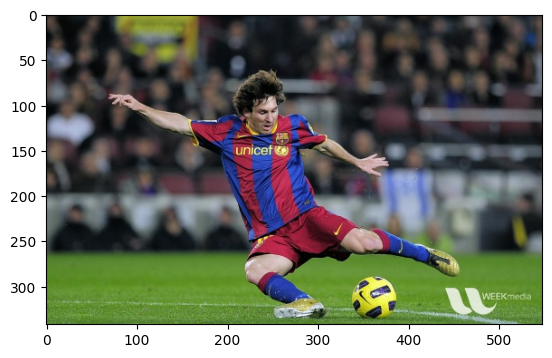

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np



im=cv.imread("/content/messi5.jpg",1)

print(im.shape)

im=cv.cvtColor(im,cv.COLOR_BGR2RGB)

plt.imshow(im)

You can access a pixel value using its row and column coordinates. For a BGR image, it returns an array of Blue, Green, and Red values. For a grayscale image, only the corresponding intensity value is returned.  

In [ ]:
px = im[100,100]
print( px )

im[100,100]=[255,10,20]
print( im[100,100] )

[200 166 157]
[255  10  20]


### **Accessing Image Properties**  

Image properties include the number of rows, columns, and channels; image data type; number of pixels; etc.

In [ ]:
print( im.shape )
print( im.size )
print( im.dtype )

(342, 548, 3)
562248
uint8


### **Regions of Interest**  

Sometimes, you will need to work with specific regions of an image.  

Regions of interest are obtained again using Numpy indexing. Here, I select the ball and copy it to another region of the image:  

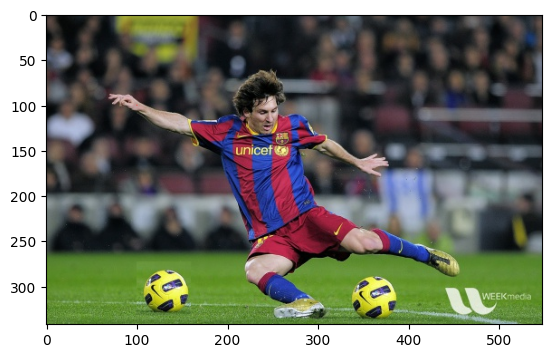

In [ ]:
ball = im[280:340, 330:390]
im[273:333, 100:160] = ball


plt.imshow(im,cmap='gray')

### **2D Convolution**  
Let's try implementing a convolution operation:  

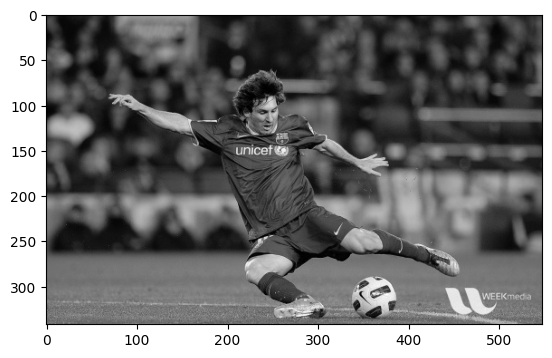

In [ ]:
im=cv.imread("/content/messi5.jpg",0)

#im=cv.resize(im, (300,300))

plt.imshow(im,cmap='gray')

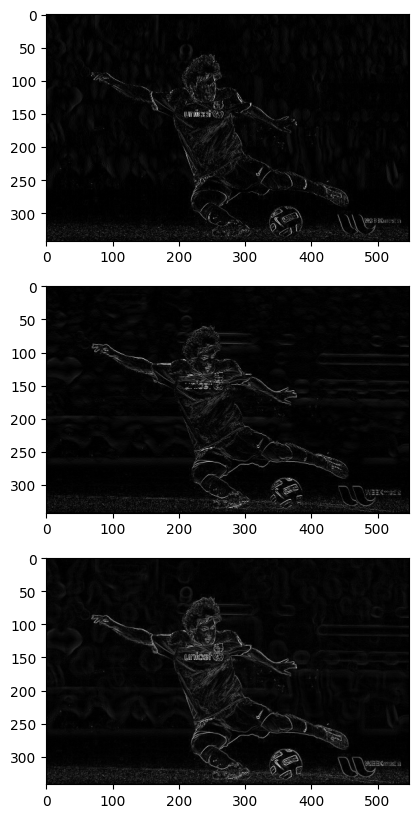

In [ ]:
kernelx=np.array([-1,1])
kernely=np.array([-1,1])

Gx=np.zeros(shape=im.shape,dtype=im.dtype)
Gy=np.zeros(shape=im.shape,dtype=im.dtype)


for i in range(im.shape[0]):
  for j in range(im.shape[1]):
    Gx[i,j]=np.abs(np.sum(np.multiply(kernelx, im[i:i+2,j])))
    Gy[i,j]=np.abs(np.sum(np.multiply(kernely, im[i,j:j+2])))

G=(Gx+Gy)/2

plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
plt.imshow(Gy,cmap='gray')
plt.subplot(3, 1, 2)
plt.imshow(Gx,cmap='gray')
plt.subplot(3, 1, 3)
plt.imshow(G,cmap='gray')


We can also use the optimized function **Filter2D()**, which convolves an image with a kernel, making it blurry (in the case of a low-pass filter) or detecting image features (in the case of a high-pass filter).  

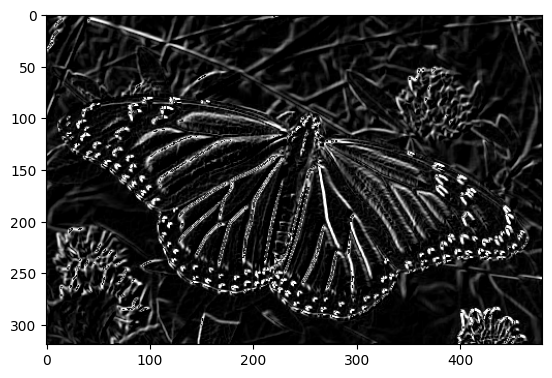

In [ ]:

im=cv.imread("/content/monarch_in_may_thumb.jpg",0)


kernely=np.array([[-1,0,1],
        [-1,0,1],
        [-1,0,1]])

kernelx=np.array([[-1,-1,-1],
        [0,0,0],
        [1,1,1]])

resulting_imagey = cv.filter2D(im, -1, kernely)
resulting_imagex = cv.filter2D(im, -1, kernelx)

resulting_image = (resulting_imagex+resulting_imagey)/2

plt.imshow(resulting_image,cmap='gray')

array([[239, 231, 255, ...,  15,   7, 151],
       [233, 240, 240, ...,  15,  15, 159],
       [185, 208, 208, ...,  11,  15, 159],
       ...,
       [233, 232, 111, ..., 105, 233, 252],
       [105, 104, 104, ..., 233, 232, 252],
       [233, 232, 233, ..., 233, 232, 252]], dtype=uint8)
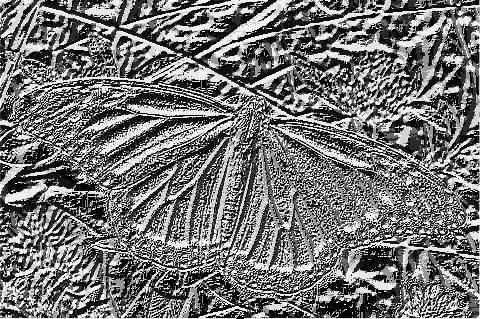

In [ ]:
offsets = [(-1, -1), (-1, 0), (-1, 1),
            (0, -1),          (0, 1),
            (1, -1), (1, 0), (1, 1)]

census_image = np.zeros_like(im, dtype=np.uint8)

padded_image = np.pad(im, pad_width=1, mode='constant', constant_values=0)

for i, (dy, dx) in enumerate(offsets):
    shifted = np.roll(np.roll(padded_image, dy, axis=0), dx, axis=1)[1:-1, 1:-1]

    binary_result = (shifted < im).astype(np.uint8)

    census_image |= (binary_result << (7 - i))

census_image
